> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project:- No-show medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The main qeustion we are trying to answer here is why 30% of patients miss their scheduled appointment. We are trying to predict the most important factors that affect the atendance of the patient.

**Some questions we can ask to help us explore the data :**

Does the patient gender has a realation with the atendance?

Does the neighborhood play a role in making patients don't show up? "Location of the hospital"

Which pateints show up more? Does old age take care of their health more than youth?

Does the disease type affect the patient's show up?

#### Column definition (described from author) :

PatientId - Identification of a patient

AppointmentID - Identification of each appointment

Gender = Male or Female

ScheduledDay = The day of the actual appointment

AppointmentDay = The day someone called or registered the appointment

Age = Age of the patient

Neighbourhood = Where the appointment takes place.

Scholarship = If the person receives welfare assistance (True of False)

Hipertension = True or False

Diabetes = True or False

Alcoholism = True or False

Handicap = True or False

SMS_received = 1 or more messages sent to the patient.

No-show = True or False.

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

### Read data from csv file

In [8]:
df = pd.read_csv(r'C:\Users\ascom\Downloads\investigate-a-dataset-template.ipynb\noshowappointments-kagglev2-may-2016.csv',parse_dates=['ScheduledDay','AppointmentDay'])

by using ( parse_dates ) while reading csv file , I convert ScheduledDay and AppointmentDay from object type to datetime 

In [9]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [15]:
df.shape

(110527, 14)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [13]:
df.describe(include='O').T

,count,unique,top,freq
Gender,110527,2,F,71840
Neighbourhood,110527,81,JARDIM CAMBURI,7717
No-show,110527,2,No,88208


In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

##### Great! No missing data or duplicated ones.



In [19]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

##### We don't need patient id or appointment id for analysis, so we will drop them


In [20]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Age can't be negative so we will drop the -1


In [56]:
df = df[df['Age'] >= 0]    # drop negative age

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Target category (No-show)

In [27]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

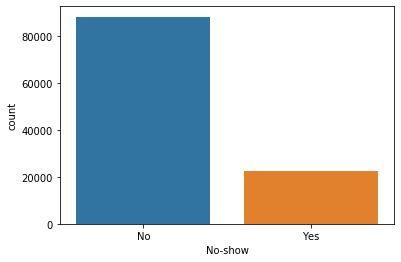

In [28]:
sns.countplot(data=df,x='No-show')

#### I will show how other categories affect the target one (No-show)

#### 1. Gender

In [29]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

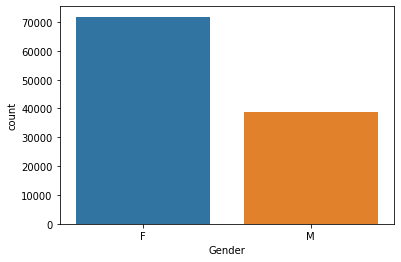

In [30]:
sns.countplot(data=df,x='Gender')

Females are more no-show than males :

1. Females' count is 71840
2. Males' count is 38687


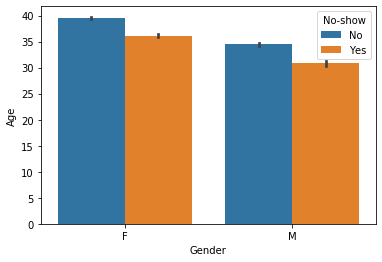

In [32]:
sns.barplot(data=df,x='Gender',y='Age',hue='No-show')

### 2. Age

In [58]:
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

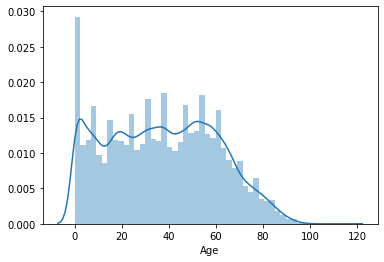

In [64]:
sns.distplot(df.Age)

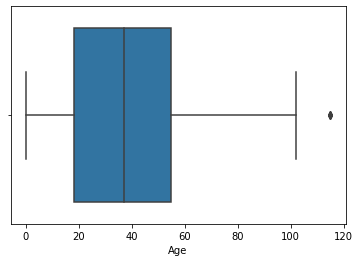

In [65]:
sns.boxplot(data=df,x="Age")

There is no outliers

### 3.Neighbourhood

In [66]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [67]:
df.Neighbourhood.value_counts().head()

JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: Neighbourhood, dtype: int64

### 4. Scholarship

In [68]:
df.Scholarship.value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

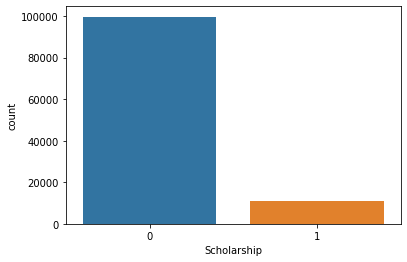

In [69]:
sns.countplot(data=df,x='Scholarship')

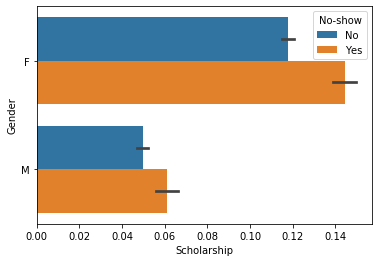

In [71]:
sns.barplot(data=df,x='Scholarship',y='Gender',hue='No-show')

### 5. SMS_received

In [81]:
df.SMS_received.value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

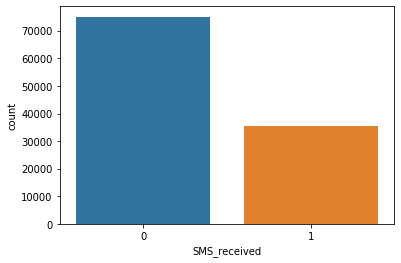

In [82]:
sns.countplot(data=df,x='SMS_received')

#### we see that most of them didn't recieve SMS



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C072819E48>,
      dtype=object)

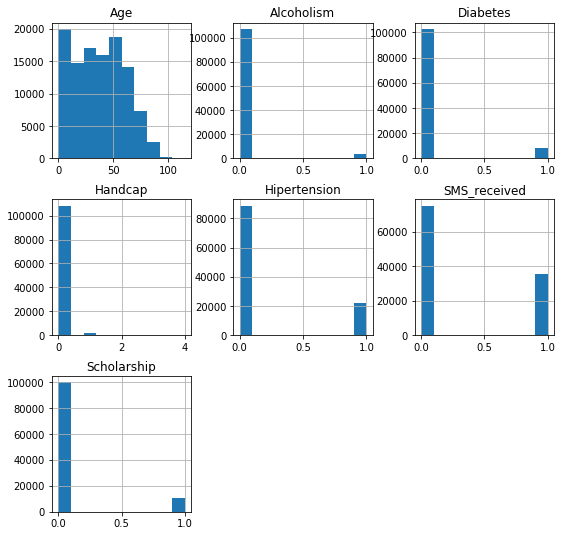

In [73]:
df.hist(figsize=(9,9))

In [79]:
# Rename incorrect columns names
df = df.rename(columns={'Handcap':'Handicap', 'Hipertension':'Hypertension'})
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No-show'],
      dtype='object')

In [80]:
# rename the No-show column to avoid misleading

df = df.rename(columns={'No-show':'Absent'})
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'Absent'],
      dtype='object')

### 1. Does the patient gender has a realation with the atendance?


In [83]:
df.Gender.value_counts()


F    71839
M    38687
Name: Gender, dtype: int64

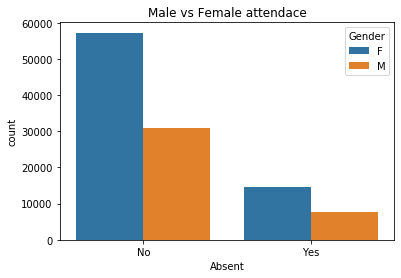

In [84]:
sns.countplot(x='Absent', hue='Gender',data=df);
plt.title('Male vs Female attendace');

##### The number of females show up is greater than the males. May be because we have more data of females but that also show that they vist hospitals more in general.

#### 2. Does the neighborhood play a role in making patients don't show up? "Location of the hospital"


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text xticklabel objects>)

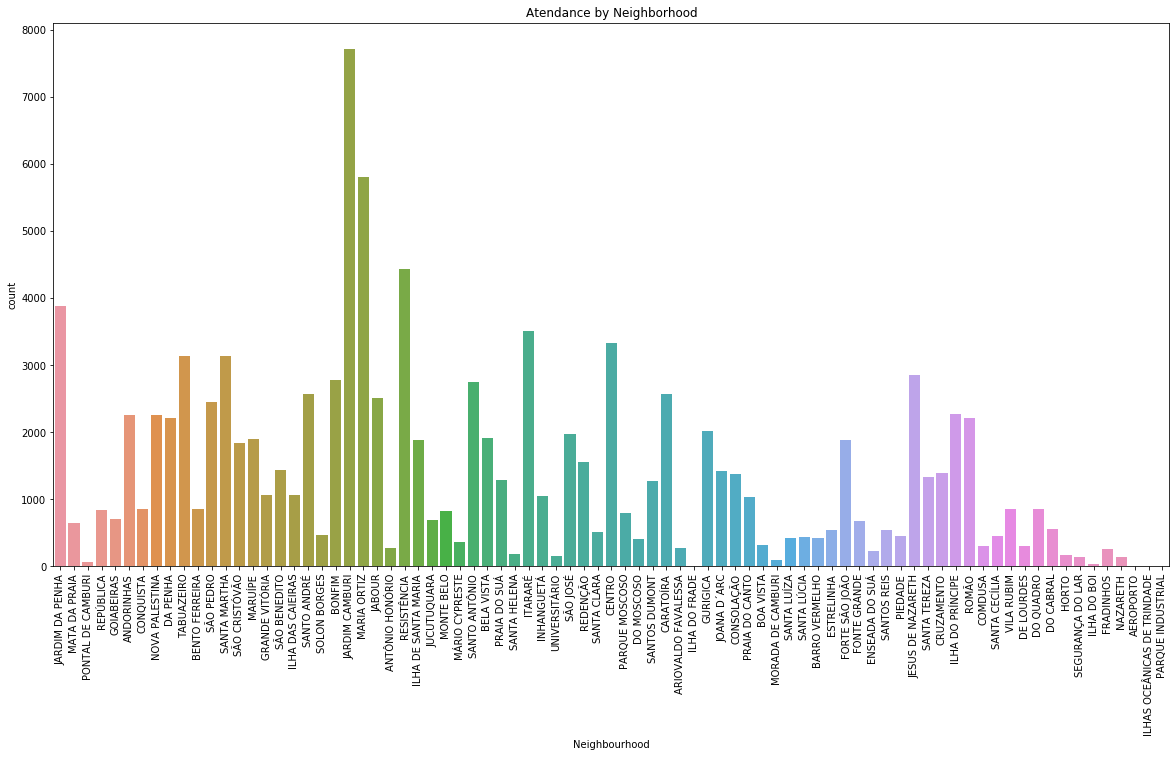

In [87]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.Neighbourhood);
plt.title('Atendance by Neighborhood')
plt.xticks(rotation=90)

##### We see that some neighborhood have more people show up for their appointment and this indicates that this area have increase in diseases



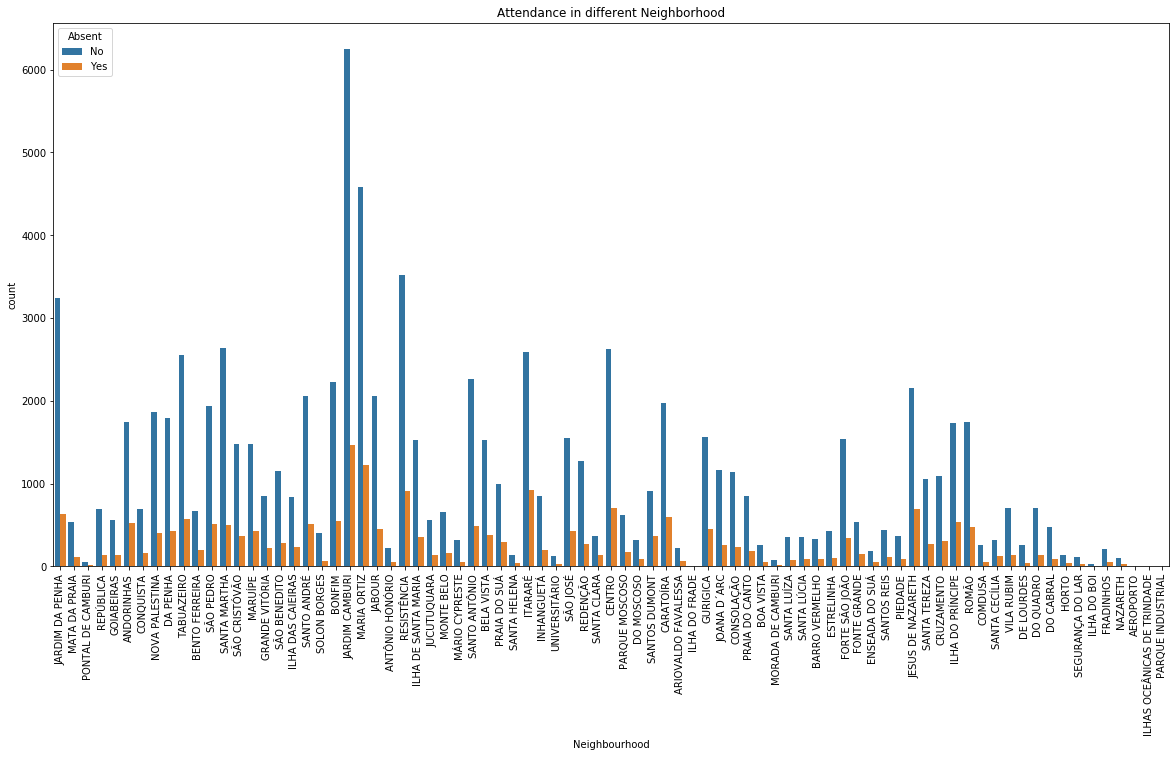

In [88]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df['Neighbourhood'], hue=df['Absent']);
plt.xticks(rotation=90);
plt.title('Attendance in different Neighborhood');

##### In most neighborhoods patients attend more in the more the area where there are more disease

#### 3. Which pateints show up more? Does old age take care of their health more than youth?

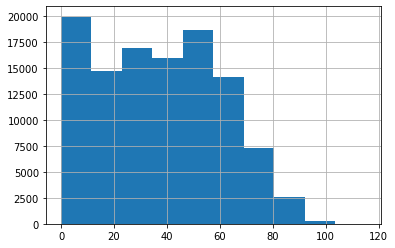

In [89]:
df['Age'].hist(bins=10);

In [90]:
df.Age.mean()

37.089218826339504

##### We see that most of the patients in the data are youth



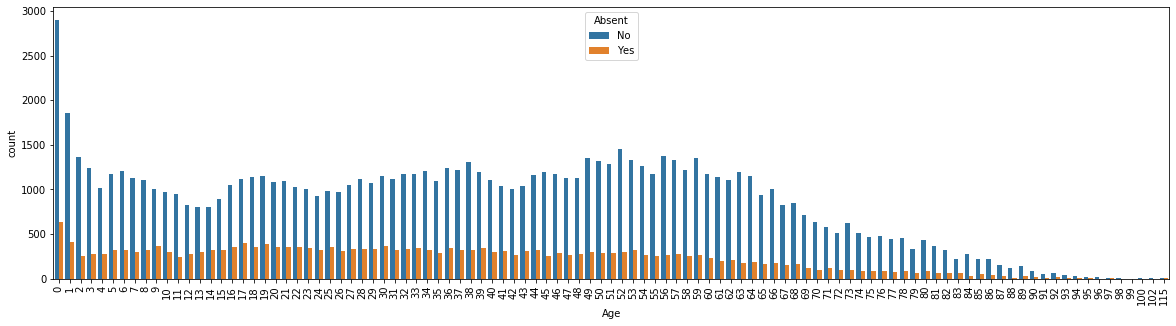

In [91]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['Age'], hue=df['Absent'])
plt.xticks(rotation=90);

##### This shows that the ratio are close but youth still show up more which the oppisite of what we argued at the beginning



#### 4. Does the disease type affect the patient's show up?

In [92]:
disease_columns = df[['Hypertension','Diabetes','Alcoholism','Handicap']]

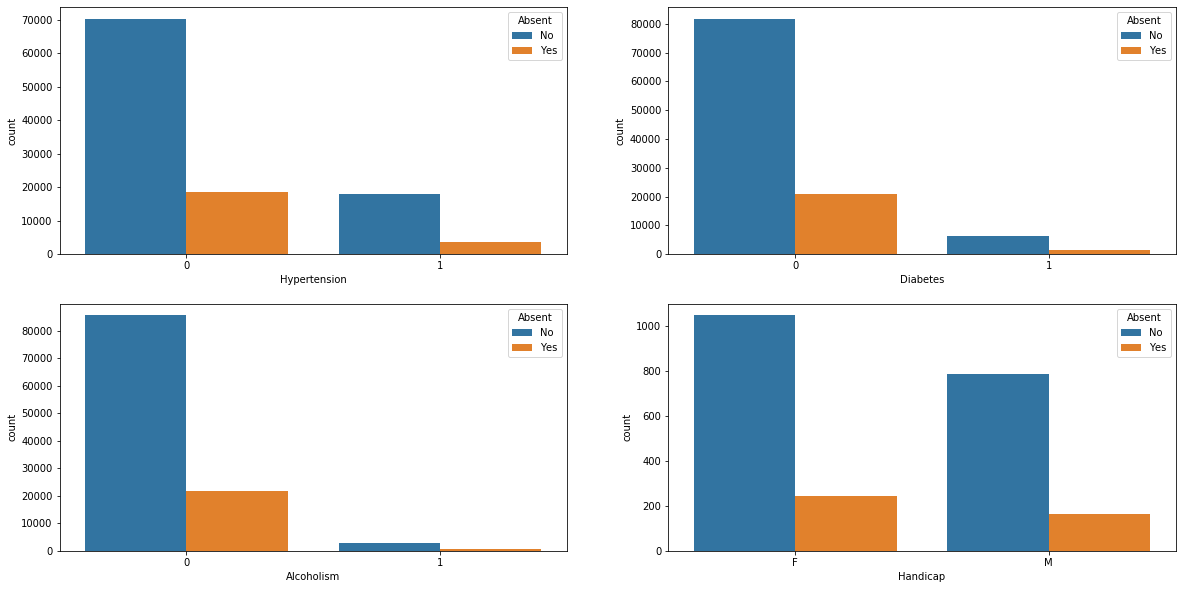

In [93]:
plt.figure(figsize=(20,10));
plt.subplot(2,2,1)
sns.countplot(disease_columns['Hypertension'],hue=df['Absent'])
plt.subplot(2,2,2)
sns.countplot(disease_columns['Diabetes'],hue=df['Absent'])
plt.subplot(2,2,3)
sns.countplot(disease_columns['Alcoholism'],hue=df['Absent'])
plt.subplot(2,2,4)
sns.countplot(disease_columns['Handicap'],hue=df['Absent'])

##### We see that most of them don't have a disease and show up for appointment but we notice that patients of hypertension show up either when they are infected or not which is a mark that hypertension will probably show up more.

<a id='conclusions'></a>
## Conclusions



#### Now we can see the factors that affect the absence of the patients more clearly. The gender and age are the most important factor as we saw earlier that female and youth show up for their appointment more than male and old people. Neighbohood and hypertension come after gender and age as there are some neighborhoods that the diseases are spread and patients with hypertension tend to show up if they have it or not. So we need to search for more factors to help patient remmenber their appointments and show up.